### Se importan las librerías necesarias

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Se definen funciones importantes

In [2]:
# Esta función obtiene el índice de refracción del medio y el error asociado


def indice_de_refaccion(dataframe):
    dataframe["seno_incidente"] = round(np.sin(dataframe["incidente"] * np.pi / 180), 3)
    dataframe["seno_refractado"] = round(np.sin(dataframe["refractado"] * np.pi / 180), 3)
    dataframe["indice_de_refraccion"] = round(dataframe["seno_incidente"] / dataframe["seno_refractado"], 3)
    indice = round(dataframe["indice_de_refraccion"].mean(), 3)
    desv_est = round(dataframe["indice_de_refraccion"].std(), 3)
    print(f"El indice de refracción es -> {indice} +/- {desv_est}")
    print(f'\tEl error porcentual es -> {round(desv_est / indice * 100, 3)}%')
    return indice, desv_est
    

### Se cargan los datos resultantes de las mediciones en Tracker

In [3]:
angulos_31 = pd.read_csv("../data/angulos_31.csv")
angulos_61 = pd.read_csv("../data/angulos_61.csv")
angulos_barra_gruesa = pd.read_csv("../data/angulos_barra_gruesa.csv")

### Se obtienen los índices de refracción para los diferentes medios

$$n=n_i\frac{\sin{\theta_i}}{\sin{\theta_t}}$$

donde $n_i\approx1$ es el indice de refracción del aire

##### Medio con concentración grenetina/agua 3:1

In [4]:
indice_31, error_31 = indice_de_refaccion(angulos_31)

El indice de refracción es -> 1.215 +/- 0.23
	El error porcentual es -> 18.93%


##### Medio con concentración grenetina/agua 6:1

In [5]:
indice_61, error_61 = indice_de_refaccion(angulos_61)

El indice de refracción es -> 1.334 +/- 0.121
	El error porcentual es -> 9.07%


##### Barra de silicón gruesa

In [6]:
indice_barra, error_barra = indice_de_refaccion(angulos_barra_gruesa)

El indice de refracción es -> 1.669 +/- 0.164
	El error porcentual es -> 9.826%


In [21]:
indices = [1.069, indice_31, indice_61, indice_barra]
errores = [0.003, error_31, error_61, error_barra]
angulos_criticos = [69.302, 55.391, 48.558, 36.81]
errores_angulos_criticos = [0.008, 0.405, 0.183, 0.0205]

<ErrorbarContainer object of 3 artists>

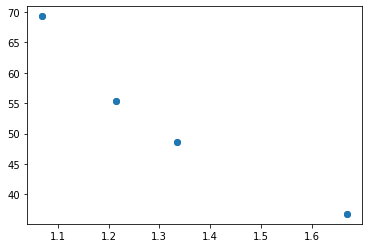

In [22]:
plt.scatter(indices, angulos_criticos)
plt.errorbar(indices, angulos_criticos, yerr=errores_angulos_criticos, fmt="o")

In [34]:
def angulo_critico(datos_indice_refraccion, a, offs):
    ang_crit = a * np.arcsin(1 / datos_indice_refraccion) * 180 / np.pi + offs
    # err = round(datos_indice_refraccion[0] / np.sqrt(datos_indice_refraccion[0] ** 2 - 1) * datos_indice_refraccion[1], 3)
    return ang_crit#, err

In [62]:
popt, _ = curve_fit(angulo_critico, indices, angulos_criticos, maxfev=4000)
popt

array([ 1.00000919e+00, -2.67746303e-04])

In [64]:
a, offs = popt
print("\n----------------Parámetros de la Ecuación------------------\n")
print(f'a = {round(a, 3)} +/- {round(np.sqrt(np.diag(_))[0], 3)}\noffs = {round(offs, 3)} +/- {round(np.sqrt(np.diag(_))[1], 3)}\n')
print("\n---------------Error Porcentual de Parámetros--------------\n")
print(f'err(a) = {round(round(np.sqrt(np.diag(_))[0], 3) / round(a, 3) * 100, 3)}%\nerr(offs) = {round(round(np.sqrt(np.diag(_))[1], 3) / round(offs, 3) * 100, 3)}%\n')



----------------Parámetros de la Ecuación------------------

a = 1.0 +/- 0.0
offs = -0.0 +/- 0.0


---------------Error Porcentual de Parámetros--------------

err(a) = 0.0%
err(offs) = nan%



<ipython-input-64-10541435d065>:5: RuntimeWarning: invalid value encountered in double_scalars
  print(f'err(a) = {round(round(np.sqrt(np.diag(_))[0], 3) / round(a, 3) * 100, 3)}%\nerr(offs) = {round(round(np.sqrt(np.diag(_))[1], 3) / round(offs, 3) * 100, 3)}%\n')


In [38]:
x = np.arange(0, 2, 0.001)
y = angulo_critico(x, a, offs)

<ipython-input-34-e41c0dc05576>:2: RuntimeWarning: divide by zero encountered in true_divide
  ang_crit = a * np.arcsin(1 / datos_indice_refraccion) * 180 / np.pi + offs
<ipython-input-34-e41c0dc05576>:2: RuntimeWarning: invalid value encountered in arcsin
  ang_crit = a * np.arcsin(1 / datos_indice_refraccion) * 180 / np.pi + offs


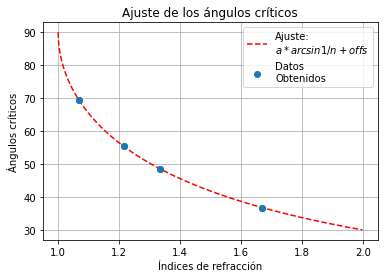

In [59]:
plt.scatter(indices, angulos_criticos, label="Datos\nObtenidos")
plt.errorbar(indices, angulos_criticos, yerr=errores_angulos_criticos, fmt="o")
plt.plot(x, y, '--', color='red', label="Ajuste:\n" + "$a*arcsin1/n + offs$")
plt.title("Ajuste de los ángulos críticos")
plt.xlabel("Índices de refracción")
plt.ylabel("Ángulos críticos")
plt.legend()
plt.grid()
  